<a href="https://colab.research.google.com/github/clairezhang1028/NYU_Integrated_Marketing/blob/main/%E2%80%9CFinal_version_Predicting_Customer_Churn_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np

In [44]:
pip install pingouin

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/clairezhang1028/NYU_Integrated_Marketing/main/WHR20_DataForFigure.csv')
df=df.dropna()
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [46]:
df.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

# Regression

## Scatterplot
https://seaborn.pydata.org/generated/seaborn.scatterplot.html


In [47]:
#install the package
import seaborn as sns

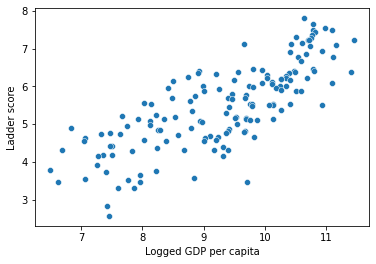

In [48]:
x='Logged GDP per capita'
y='Ladder score'
sns.scatterplot(data=df, x=x, y=y)

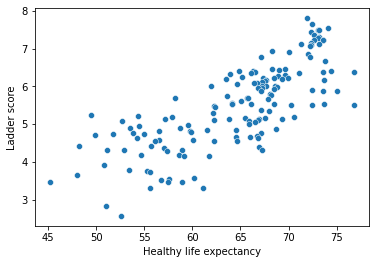

In [49]:
x='Healthy life expectancy'
y='Ladder score'
sns.scatterplot(data=df, x=x, y=y)

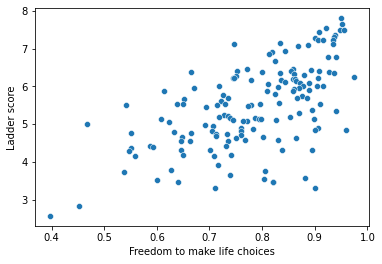

In [50]:
x='Freedom to make life choices'
y='Ladder score'
sns.scatterplot(data=df, x=x, y=y)

### Regression Result
https://www.statsmodels.org/stable/regression.html

In [51]:
import statsmodels.api as sm

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

In [53]:
# define the dependent and independent variables
X=df[['Logged GDP per capita','Healthy life expectancy','Freedom to make life choices']]
y=df['Ladder score']


In [54]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,Logged GDP per capita,Healthy life expectancy,Freedom to make life choices
0,1.0,10.639267,71.900825,0.949172
1,1.0,10.774001,72.402504,0.951444
2,1.0,10.979933,74.102448,0.921337
3,1.0,10.772559,73.000000,0.948892
4,1.0,11.087804,73.200783,0.955750


In [55]:
# conduct regression
model = sm.OLS(y, X).fit()

In [56]:
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     122.8
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           4.39e-40
Time:                        09:21:32   Log-Likelihood:                -137.65
No. Observations:                 153   AIC:                             283.3
Df Residuals:                     149   BIC:                             295.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Check assumptions

In [57]:
### get the residuals
predictions = model.predict(X)
residuals =y-predictions
df_res=pd.DataFrame({'Residual': residuals, 'Prediction': predictions})
df_res.head()

,Residual,Prediction
0,1.034022,6.774678
1,0.791257,6.854343
2,0.630089,6.929811
3,0.628848,6.875652
4,0.468615,7.019385


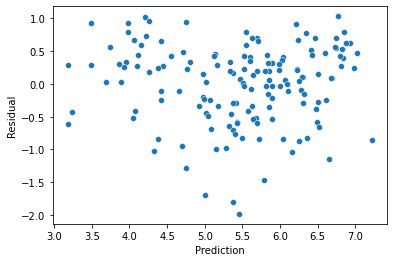

In [58]:
#print the scatter plot between residuals and predicitions
x='Prediction'
y='Residual'
sns.scatterplot(data=df_res, x=x, y=y)

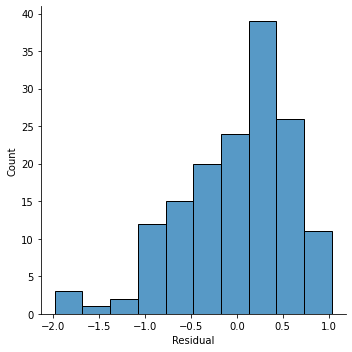

In [59]:
# histogram of the residual
sns.displot(df_res, x="Residual")

In [60]:
x=df_res['Residual']
pg.normality(x)

,W,pval,normal
Residual,0.960844,0.000251,False


In [61]:
pg.pairwise_corr(df,columns=['Logged GDP per capita','Healthy life expectancy','Freedom to make life choices'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,Logged GDP per capita,Healthy life expectancy,pearson,two-sided,153,0.848,"[0.8, 0.89]",0.720,0.716,1.251,0.0,1.546e+40,1.0
1,Logged GDP per capita,Freedom to make life choices,pearson,two-sided,153,0.419,"[0.28, 0.54]",0.176,0.165,0.447,0.0,1.795e+05,1.0
2,Healthy life expectancy,Freedom to make life choices,pearson,two-sided,153,0.449,"[0.31, 0.57]",0.201,0.191,0.483,0.0,1.935e+06,1.0


#Logit Analysis

In [62]:
df['Churn_Numeric'] = df['churn'].apply(lambda x: 1 if x =='yes' else 0)
df.head()

KeyError: ignored

In [ ]:
y=df['Churn_Numeric']
X=df[['total_intl_charge','number_customer_service_calls','account_length']]

In [ ]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

In [ ]:
# conduct regression
logit_model = sm.Logit(y, X).fit()

In [ ]:
# print model summary
print(logit_model.summary())

In [ ]:
### get the odds ratio
np.exp(logit_model.params)

In [ ]:
### get the predictions 
pred_prob = logit_model.predict(X)
df_result=pd.DataFrame({'Pred_prob': pred_prob,'y':y})
df_result['Prediction']=df_result['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_result.head()

In [ ]:
from sklearn.metrics import accuracy_score
Prediction = df_result['Prediction']
accuracy_score(y, Prediction)

# Cross Validation

In [ ]:
## get the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# conduct regression
logit_model = sm.Logit(y_train, X_train).fit()

In [ ]:
# print model summary
print(logit_model.summary())

In [ ]:
### get the predictions on the test data
pred_prob = logit_model.predict(X_test)
df_test=pd.DataFrame({'Pred_prob': pred_prob,'y_test':y_test})
df_test['Prediction']=df_test['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_test.head()

In [ ]:
from sklearn.metrics import accuracy_score
Prediction =df_test['Prediction']
accuracy_score(y_test, Prediction)

### draw confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix
confmtrx = np.array(confusion_matrix(y_test, Prediction))
pd.DataFrame(confmtrx, index=['Non-Churn','Churn'],
columns=['predicted_Non_Churn', 'predicted_Churn'])

#Calculate the F1 score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, Prediction)

# Cross validation for multiple times

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
scores = cross_val_score(log_reg, X, y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

# Appendix

In [ ]:
Z =np.linspace(-100,100,10000)
P=np.exp(Z)/(1+np.exp(Z))
import plotly.express as px
fig = px.scatter(x=Z, y=P)
fig.show()